In [1]:
import math as m

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Assignment 1 - Introduction to Network Science.pdf

This work has been done as a collaboration between Simon Moser and Oliver Kamer.

**Simon Moser**
simon.moser@uzh.ch
18-713-388

**Oliver Kamer**
oliver.kamer@uzh.ch
16-921-009

## A01.1 Building and visualising networks

In [2]:
n = 32

#### 1. Star network ####

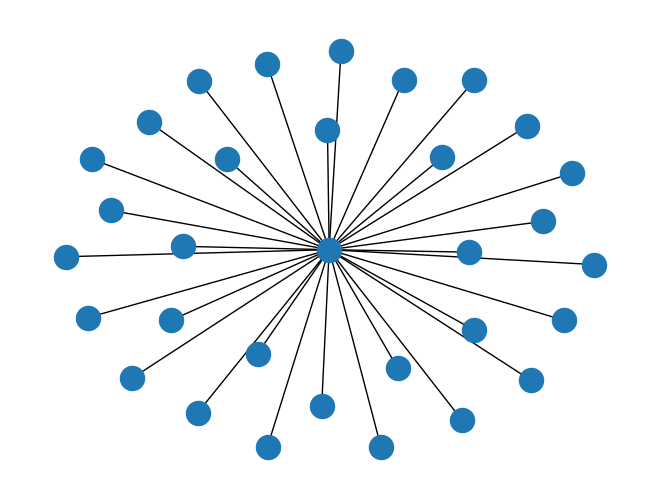

In [3]:
star_network = nx.Graph()
star_network.add_node(0)
for i in range(1, n):
    star_network.add_node(i)
    star_network.add_edge(0, i)

nx.draw(star_network)

#### 2. Fully-connected ####

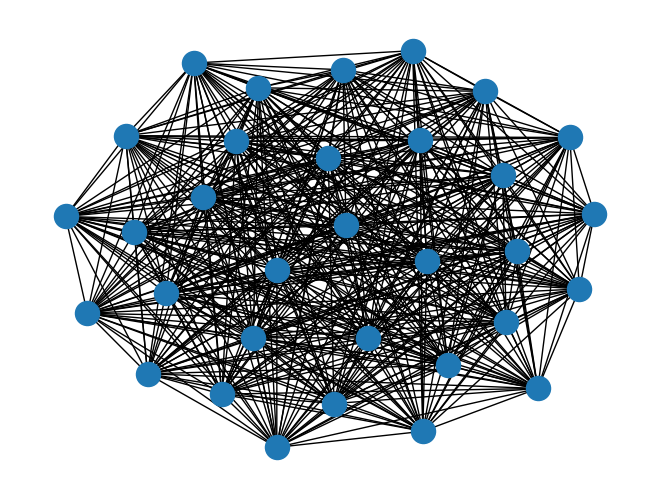

In [4]:
fully_connected = nx.Graph()
for i in range(n):
    fully_connected.add_node(i)
    for j in range(i - 1):
        fully_connected.add_edge(i, j)

nx.draw(fully_connected)

#### 3. One-dimensional lattice with periodic boundary conditions where each node $i$ has degree $k_i = 2$  ####

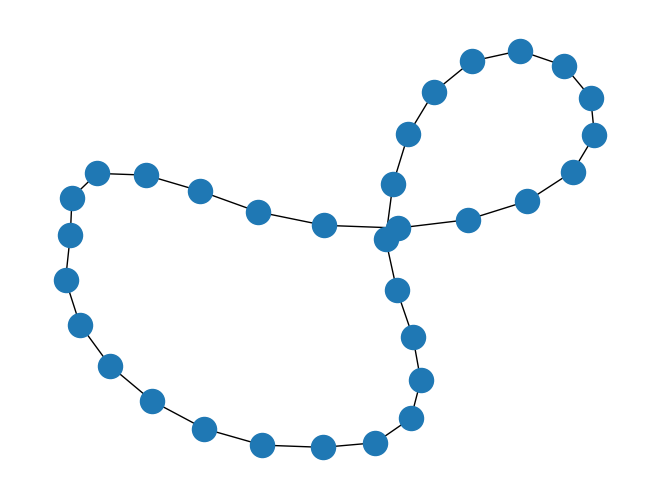

In [5]:
# Depending on the definition of one-demensional lattice.

one_dimensional_lattice = nx.Graph()
for i in range(n):
    one_dimensional_lattice.add_node(i)
    if i > 0:
        one_dimensional_lattice.add_edge(i, i - 1)

one_dimensional_lattice.add_edge(0, n - 1)

nx.draw(one_dimensional_lattice)

## A01.2 ##

#### 1. Compute the average degree $\langle \kappa \rangle$ and the density $\delta$ of the networks.

In [6]:
karate = nx.read_gml("karate.gml", label="id")
netscience = nx.read_gml("netscience.gml", label="label")
facebook = nx.read_edgelist(
    "facebook_combined.txt", create_using=nx.Graph(), nodetype=int
)


networks = [
    {"name": "Karate", "network": karate},
    {"name": "Netscience", "network": netscience},
    {"name": "Facebook", "network": facebook},
]

for n in networks:
    print(f"Dataset: {n['name']}")
    network = n["network"]
    print(
        f"average degree ⟨𝑘⟩: {np.average([(len(network.edges(node))) for node in network.nodes])}"
    )
    print(
        f"density 𝛿: {len(network.edges) / (len(network.nodes) * (len(network.nodes) - 1))}"
    )
    print()

Dataset: Karate
average degree ⟨𝑘⟩: 4.588235294117647
density 𝛿: 0.06951871657754011

Dataset: Netscience
average degree ⟨𝑘⟩: 3.4512271869100064
density 𝛿: 0.0010866584341656191

Dataset: Facebook
average degree ⟨𝑘⟩: 43.69101262688784
density 𝛿: 0.0054099817517196435



#### 2. Write a function `max_degree` that takes a network as its argument, and returns two values: the id/name/label of the node with the largest degree, and the value of its degree. *Test it on the datasets given*.

In [7]:
def max_degree(network):
    nodes = list(network.nodes)
    max_node = nodes[0]
    for node in nodes:
        if len(network.edges(node)) > len(network.edges(max_node)):
            max_node = node
    return max_node, len(network.edges(max_node))

In [8]:
for n in networks:
    print(n["name"])
    print(max_degree(n["network"]))
    print()

Karate
(34, 17)

Netscience
('BARABASI, A', 34)

Facebook
(107, 1045)

